## baseline paper

write intro here


### Methods and data

write methods here

### Results

write methods here

##### import libraries

pandas for data management, numpy and seaborn for analysis, matplotlib for visualization. Other libraries as needed for specific tasks (e.g. PAM).

In [72]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tableone import TableOne, load_dataset
from semopy import Model

%matplotlib inline

##### read data

read data files here (csv ideally but also dta if needed) using pandas (follow the notation on the example).

In [98]:
# baseline data

#baseline1 = pd.read_excel('../data/baseline.xlsx', index_col=0) 
baseline2 = pd.read_csv('../data/baseline.csv')
pd.set_option('display.max_columns', None)
baseline2.rename(columns = {'Total score':'Total_score', 'Comorbilidades.Desnutricion cronica':'Comorbilidades.Desnutricion.cronica'}, inplace = True)

##### data manipulation

In [99]:
baseline2.head()

,Distrito,Comunidad,DNI_del_ni0,Edad_meses,Sexo,El_ni0_ha_recibido_una_prueb,Hemoglobina,Vacunacion,Edad_de_la_madre_o_cuidador,Embarazo_por_primera_vez,Hasta_que_grado_estudiaste_en_,Controles_prenatales,Suplementacion_embarazo,Problemas_embarazo.Anemia,Lugar_de_parto,Lactancia_meses,Tenia_Fiebre_o_tos1,Cuantos_dias_Fiebre_o_tos2,Fue_aposta_Fiebre_o_tos3,Tenia_Diarrea1,Cuantos_dias_Diarrea2,Fue_aposta_Diarrea3,Que_dar_Diarrea4.Nada en especial,Que_dar_Diarrea4.Sales de rehidratacion,Que_dar_Diarrea4.Frutiflex o electrolight/1milar,Diarrea4.Suero casero (preparación hecha en casa),Que_Dar_Diarrea4.Zinc,Que_Dar_Diarrea4.Pastilla antibiotico,Comorbilidades.Desnutricion.cronica,Comorbilidades.Anemia,Comorbilidades.Para1to1s,Comorbilidades.Neumonia,Comorbilidades.Malaria,Dar_Suplementacion_hierro,Dar_Suplementacion_multimicronut0,Suplementacion_chispitas_meses,Dar_Despara1tacion,Household_wealth_tv.radio.teli.cementfloor,Clean_water_source,drinks_from_river,Toilet_sanitary,toilet_latrina,toilet_openair,Tratamiento_de_agua,Tratamiento_de_agua_formas.La hierven,Tratamiento_de_agua_formas.Le echan lejia / cloro,Programa_social.CunaMas - Cuidado Diur0,Programa_social.CunaMas - SAF,Programa_social.Juntos,Programa_social.Vaso de Leche,Cuantos_Visita_ACS_year,ACS_ayuda,z_MOT,z_COG,z_LANG,z_SEM,z_OVERALL,Identifier,Score_beneficios_lm,score_para_produc_mas_lm,score_edad_lme,score_lactancia_prolongada,score_alimentos_comida_nutritiva,score_Como_se_da_cuenta_desnutrido,score_Por_queesta_ni0_desnutrido,score_Consecuencias_anemia,score_Preven_anemia,score_alimentos_ricos_en_hierro,score_Recomendaciones_mnt,score_Lavdo_de_ma0s,score_trat_agua,score_Prev_diarrea,score_Prev_malaria,Total_score,Sex,Weight,Height,age_in_days,age_in_months,age_group,cmeasure,oedema,clenhei,cbmi,csex,zlen,zlen_flag,zwei,zwei_flag,zbmi,zbmi_flag,zwfl,zwfl_flag
0,Mazan,Mazan,90816732.0,14.0,Femeni0,1.0,9.9,0,17.0,15.0,Primaria_completa,Algunas,1,0.0,Centro_de_salud,9.0,0.0,NaN,NaN,1.0,21.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,NaN,1,2.0,1.0,0.0,0.0,1.0,0.0,Nunca,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,-1.477,-0.191,-0.353,-0.147,-0.839,338.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,1.0,1.0,1.0,20.0,F,1.0,72.0,375.0,12.320329,12-23 mo,NaN,n,72.0,1.929012,2.0,-0.93,0.0,-9.88,1.0,-13.03,1.0,-12.78,1.0
1,Tamshiyacu,Tamshiyacu,90925678.0,10.0,Masculi0,1.0,NaN,0,18.0,15.0,Primaria_completa,Todos,1,0.0,Hospital,NaN,1.0,2.0,0.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,0_aplica,2.0,0.0,1.0,0.0,1.0,0.0,Siempre,1.0,0.0,1.0,0.0,0.0,1.0,12.0,0,-0.778,-1.113,-1.451,-0.807,-1.021,361.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,19.0,M,5.5,87.0,61.0,2.004107,00-05 mo,NaN,n,87.0,7.266482,1.0,14.28,1.0,-0.10,0.0,-7.52,1.0,-8.35,1.0
2,Punchana,Padre cocha,1.0,12.0,Femeni0,1.0,9.0,1,35.0,16.0,Primaria_completa,Todos,1,0.0,Hospital,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,NaN,0,0.0,1.0,0.0,0.0,1.0,0.0,A_veces,1.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,-1.228,-1.073,-1.055,-0.824,-1.112,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,19.0,F,8.7,53.0,338.0,11.104723,06-11 mo,NaN,n,53.0,30.971876,2.0,-7.88,1.0,-0.04,0.0,7.66,1.0,9.51,1.0
3,Tamshiyacu,Gallito,79735695.0,35.0,Femeni0,1.0,10.9,1,28.0,16.0,Secundaria_completa,Algunas,0,0.0,Puesto_de_salud,24.0,1.0,7.0,1.0,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,NaN,1,3.0,0.0,0.0,0.0,1.0,0.0,Llega_tratada,0.0,0.0,0.0,0.0,1.0,0.0,0.0,NaN,1.106,1.186,0.894,1.740,1.196,44.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,16.0,F,11.8,69.0,1076.0,35.351129,24-35 mo,NaN,n,69.0,24.784709,2.0,-6.77,1.0,-1.20,0.0,5.39,1.0,3.98,0.0
4,Las_Amazonas,Yanashi,81376142.0,32.0,Femeni0,1.0,12.8,1,40.0,20.0,Primaria_completa,Todos,1,0.0,Su_domicilio,12.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,12.0,1,0.0,0.0,1.0,0.0,1.0,0.0,A_veces,1.0,1.0,0.0,1.0,1.0,1.0,48.0,0,-0.332,-0.471,-1.410,0.051,-0.893,100.0

##### basic stats

In [100]:
np.nanmean(baseline2.Edad_meses)

19.79310344827586

##### example graph

KeyError: 'area'

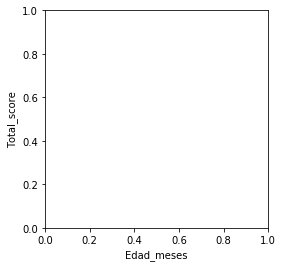

In [101]:
# change plot size
scatter1 = sns.pairplot(x_vars="Edad_meses", y_vars="Total_score", data=baseline2, hue="area", height=4)


##### example table one

In [102]:
#loading data into tableone
data=load_dataset('baseline1')

#which variables are we using?
columns = ['age','bili','albumin','ast','platelet','protime',
       'ascites','hepato','spiders','edema','sex', 'trt']

#declare categorical
categorical = ['ascites','hepato','edema','sex','spiders','trt']

#options
groupby = 'trt'
nonnormal = ['bili']

#runs tableone and stores in mytable
mytable = TableOne(data, columns=columns, categorical=categorical,
                   groupby=groupby, nonnormal=nonnormal, pval=True)

#show stuff in screen
print(mytable.tabulate(tablefmt="github"))

#exports to excel file
mytable.to_excel('mytable.xlsx')

HTTPError: HTTP Error 404: Not Found

##### semopy example model

In [117]:
mod = """ ECD ~ Knowledge + Health + CHA
          ECD =~ z_COG + z_MOT
          CHA =~ Cuantos_Visita_ACS_year
          Knowledge =~ Total_score
          Health =~ Tenia_Fiebre_o_tos1 + Tenia_Diarrea1 + Comorbilidades.Anemia + Comorbilidades.Malaria + Comorbilidades.Neumonia + Comorbilidades.Desnutricion.cronica 
          Health ~ pregnancy + sanitation
          pregnancy =~ Controles_prenatales + Problemas_embarazo.Anemia
          sanitation =~ Clean_water_source + Toilet_sanitary
      """
model = Model(mod)

In [118]:
from pandas import read_csv
#data = read_csv("../data/baseline.csv",index_col=0)
#model.load_dataset(data)
model.load_dataset(baseline2)

from semopy import Optimizer
opt = Optimizer(model)
objective_function_value = opt.optimize()

from semopy import inspect
inspect(opt)

TypeError: unsupported operand type(s) for -: 'str' and 'float'